In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from sklearn.model_selection import ShuffleSplit
from tensorflow.keras.callbacks import EarlyStopping
from bayes_opt import BayesianOptimization
from bayes_opt.logger import JSONLogger
from bayes_opt.event import Events
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('seaborn')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
# Must properly set to home directory of "NeutronSpectraGeneration" 
import sys
sys.path.append("/g/g15/mcgreivy/NeutronSpectraGeneration/")

import unfolding_network
import data_generation
import constants

ModuleNotFoundError: No module named 'GAN_network'

## This is a method for feature paramter tuning which relies on a linear regression model to act as a proxy for the unfolding neural network. 

## This saves on computation time when evaluating the objective function (evaluate_GPA_params).

In [ ]:
def evaluate_GPA_params(meanPeakWidth, stdPeakWidth, width_skew, amp_skew, extraPeakProb, ampDecay):
    
    SPLITS = 2
    benchmark = []

    xeval, yeval = data_generation.x_data_IAEA, data_generation.y_data_IAEA
    
    for _ in range(SPLITS):
        # Use feature parameters to generate data from the GPA skew algorithm
        xdata, ydata = data_generation.gaussian_peak_skew_algorithm(meanPeakWidth, stdPeakWidth, width_skew, amp_skew, extraPeakProb, ampDecay, numData = 1000)

        w = np.matmul(np.matmul(np.linalg.inv(np.matmul(xdata.T, xdata)), xdata.T), ydata)
        
        ypred = np.matmul(xeval, w)
        
        score = metrics.mean_squared_error(yeval, ypred)
        benchmark.append(score)
        
    print("{} ± {}".format(np.mean(benchmark), np.std(benchmark)))
        
    return -1e6 * np.mean(benchmark)

pbounds = {"ampDecay" : (0.4, 0.6),
           "amp_skew" : (2, 4),
           "extraPeakProb" : (0.7, 0.9),
           "meanPeakWidth" : (0.005, 0.05),
           "stdPeakWidth" : (0.005, 0.05),
           "width_skew" : (0, 0.5)}

def optimize_model(init_points = 200, n_iter = 100):    

    optimizer = BayesianOptimization(f = evaluate_GPA_params,
                                    pbounds = pbounds,
                                    verbose = 2)

    optimizer.maximize(init_points = init_points, n_iter = n_iter)

    return optimizer.max


In [38]:
optimize_model()

|   iter    |  target   | ampDecay  | amp_skew  | extraP... | meanPe... | stdPea... | width_... |
-------------------------------------------------------------------------------------------------
0.00027393774279074366 ± 2.2510046146919917e-05
|  1        | -273.9    |  0.4051   |  2.803    |  0.8739   |  0.04494  |  0.01312  |  0.4509   |
0.00020802733349569043 ± 3.859981429270526e-07
|  2        | -208.0    |  0.4857   |  3.532    |  0.7424   |  0.04745  |  0.04684  |  0.4524   |
0.0002389968640679544 ± 1.4753323904701616e-05
|  3        | -239.0    |  0.511    |  3.948    |  0.7061   |  0.02405  |  0.01655  |  0.4924   |
0.0002567001807082709 ± 1.7411505930444945e-05
|  4        | -256.7    |  0.4563   |  3.818    |  0.7096   |  0.0426   |  0.01876  |  0.3344   |
0.0002133098280731147 ± 1.296351644133416e-05
|  5        | -213.3    |  0.5698   |  2.76     |  0.7085   |  0.03719  |  0.02193  |  0.2357   |
0.00022218370520740076 ± 5.191240736675181e-06
|  6        | -222.2    |  0.481

0.00021909483415865765 ± 1.1161546298053002e-05
|  40       | -219.1    |  0.4546   |  2.133    |  0.8655   |  0.01389  |  0.03796  |  0.1858   |
0.00023468254701105242 ± 4.946651409686639e-06
|  41       | -234.7    |  0.5381   |  2.254    |  0.8306   |  0.00717  |  0.02252  |  0.1106   |
0.0002123689324321328 ± 1.5175532071591704e-05
|  42       | -212.4    |  0.4762   |  3.769    |  0.8671   |  0.03664  |  0.03323  |  0.03984  |
0.0010772813941500679 ± 8.375800985920044e-05
|  43       | -1.077e+0 |  0.4543   |  2.338    |  0.757    |  0.04804  |  0.00716  |  0.03613  |
0.00021843206701884448 ± 9.165084350601575e-06
|  44       | -218.4    |  0.4244   |  2.301    |  0.8803   |  0.01613  |  0.03308  |  0.2096   |
0.00022023372563079868 ± 1.778765348549602e-05
|  45       | -220.2    |  0.4826   |  2.461    |  0.7055   |  0.03076  |  0.03235  |  0.2521   |
0.00022476285873517836 ± 1.3370984287157248e-05
|  46       | -224.8    |  0.4349   |  3.133    |  0.7452   |  0.03165  |  0.03002

0.0002489114912119032 ± 1.2557799429654902e-05
|  80       | -248.9    |  0.5626   |  2.684    |  0.7266   |  0.04443  |  0.04599  |  0.1375   |
0.0002377351674709815 ± 2.9540816239644768e-06
|  81       | -237.7    |  0.4133   |  3.92     |  0.8887   |  0.01212  |  0.0212   |  0.1727   |
0.0002343387106749044 ± 9.00379693656971e-06
|  82       | -234.3    |  0.5105   |  2.045    |  0.7258   |  0.03906  |  0.01594  |  0.3144   |
0.00021365205851259158 ± 5.110868678069808e-06
|  83       | -213.7    |  0.5925   |  2.194    |  0.8936   |  0.01375  |  0.03246  |  0.05074  |
0.000262410727578463 ± 1.3700958208747653e-05
|  84       | -262.4    |  0.4129   |  3.273    |  0.7663   |  0.04436  |  0.01216  |  0.4005   |
0.00022752451865363133 ± 4.572397706901899e-06
|  85       | -227.5    |  0.5511   |  2.862    |  0.7735   |  0.04867  |  0.03486  |  0.2387   |
0.0003196068562068511 ± 2.412852390712406e-05
|  86       | -319.6    |  0.5561   |  2.518    |  0.8427   |  0.02993  |  0.006068 |  

0.0002208861466365119 ± 2.4424572694681685e-06
|  120      | -220.9    |  0.5283   |  3.805    |  0.7609   |  0.02112  |  0.0223   |  0.2803   |
0.00023817130913143298 ± 1.0145551536291009e-05
|  121      | -238.2    |  0.5668   |  3.437    |  0.774    |  0.03561  |  0.02352  |  0.3523   |
0.00024810133285786587 ± 1.4018799787569221e-05
|  122      | -248.1    |  0.5304   |  3.154    |  0.7243   |  0.04731  |  0.04817  |  0.0982   |
0.0002139115392818704 ± 1.5344732316477255e-05
|  123      | -213.9    |  0.4747   |  3.03     |  0.7166   |  0.03454  |  0.04498  |  0.04999  |
0.0003355924079993107 ± 1.4412327871507935e-05
|  124      | -335.6    |  0.4552   |  2.872    |  0.8804   |  0.03431  |  0.00617  |  0.1412   |
0.000237570192674081 ± 5.8464799814898e-06
|  125      | -237.6    |  0.5821   |  3.878    |  0.8327   |  0.0498   |  0.0428   |  0.08939  |
0.0002306904334320618 ± 8.201103731665603e-06
|  126      | -230.7    |  0.4995   |  2.934    |  0.8054   |  0.04398  |  0.03612  | 

0.0002285163226130326 ± 2.9965789219219804e-06
|  160      | -228.5    |  0.4843   |  2.474    |  0.783    |  0.03919  |  0.03957  |  0.347    |
0.00024173402410705653 ± 6.12345814826101e-06
|  161      | -241.7    |  0.5494   |  3.599    |  0.8229   |  0.02993  |  0.01149  |  0.1956   |
0.0002405458916679875 ± 8.073188318468406e-06
|  162      | -240.5    |  0.5685   |  2.59     |  0.7773   |  0.03791  |  0.02481  |  0.2055   |
0.0002299653483134594 ± 1.8473843870837518e-06
|  163      | -230.0    |  0.4004   |  3.334    |  0.8734   |  0.009738 |  0.02142  |  0.3064   |
0.00021809777665522873 ± 2.4676099896057713e-06
|  164      | -218.1    |  0.4316   |  2.999    |  0.8915   |  0.03419  |  0.03167  |  0.02834  |
0.00021519822186069127 ± 3.3234604039024434e-06
|  165      | -215.2    |  0.4096   |  3.632    |  0.8773   |  0.02655  |  0.01553  |  0.2213   |
0.0002172637573314296 ± 1.7613859436746144e-07
|  166      | -217.3    |  0.4267   |  3.365    |  0.7635   |  0.04875  |  0.04024 

0.00021636812433033974 ± 4.0576477937668485e-06
|  200      | -216.4    |  0.4427   |  2.258    |  0.8105   |  0.01644  |  0.048    |  0.4801   |
0.00023169440372021647 ± 1.4250493519198348e-05
|  201      | -231.7    |  0.5704   |  3.227    |  0.8799   |  0.02067  |  0.01922  |  0.4606   |
0.0002217091803441158 ± 1.6856469508179042e-05
|  202      | -221.7    |  0.5998   |  3.884    |  0.8558   |  0.02559  |  0.02075  |  0.1343   |
0.00023837027352214532 ± 1.445782290091115e-05
|  203      | -238.4    |  0.5925   |  3.679    |  0.8137   |  0.03295  |  0.02371  |  0.3385   |
0.00020144731047436258 ± 3.277957543013375e-06
|  204      | -201.4    |  0.5921   |  3.081    |  0.8873   |  0.02816  |  0.04547  |  0.2933   |
0.00021546058377286463 ± 4.4278011941419586e-06
|  205      | -215.5    |  0.5579   |  2.864    |  0.7684   |  0.04002  |  0.04658  |  0.2431   |
0.00024795027924803646 ± 2.3370096752022506e-06
|  206      | -248.0    |  0.5178   |  2.446    |  0.7902   |  0.01236  |  0.00

0.00023046617842212508 ± 9.179143325435262e-06
|  240      | -230.5    |  0.465    |  2.021    |  0.8727   |  0.02691  |  0.03378  |  0.4118   |
0.00024534600380738054 ± 1.986519539608225e-05
|  241      | -245.3    |  0.5473   |  2.865    |  0.7829   |  0.0247   |  0.01244  |  0.2712   |
0.00022131832438879027 ± 2.182362167964537e-06
|  242      | -221.3    |  0.5771   |  3.89     |  0.7816   |  0.03767  |  0.04616  |  0.2163   |
0.0002617559640750158 ± 8.39116056847229e-06
|  243      | -261.8    |  0.595    |  3.082    |  0.8918   |  0.04919  |  0.01697  |  0.2958   |
0.00023479008316461725 ± 2.9647171540384974e-05
|  244      | -234.8    |  0.523    |  2.869    |  0.7565   |  0.048    |  0.05     |  0.2654   |
0.00023133405200564033 ± 1.912817107409857e-05
|  245      | -231.3    |  0.557    |  3.55     |  0.8045   |  0.009881 |  0.0236   |  0.1227   |
0.00025538298113594735 ± 7.287302214177376e-06
|  246      | -255.4    |  0.5141   |  2.32     |  0.7929   |  0.04179  |  0.03008  

0.0004594437990187115 ± 1.8668228876855787e-05
|  280      | -459.4    |  0.5838   |  3.95     |  0.8645   |  0.04229  |  0.0061   |  0.2242   |
0.00021614721050992154 ± 1.3209129649287198e-05
|  281      | -216.1    |  0.4529   |  3.77     |  0.8732   |  0.01496  |  0.03655  |  0.07897  |
0.00022236764239423064 ± 3.450702640444081e-06
|  282      | -222.4    |  0.5948   |  3.768    |  0.7294   |  0.02532  |  0.02774  |  0.125    |
0.00021743881141159953 ± 3.492382439700283e-06
|  283      | -217.4    |  0.5105   |  3.187    |  0.8901   |  0.03848  |  0.02739  |  0.2294   |
0.0002122890120067998 ± 3.032077953989422e-06
|  284      | -212.3    |  0.5973   |  2.874    |  0.7078   |  0.03348  |  0.03602  |  0.09296  |
0.0002379069922930488 ± 2.7846300359019683e-06
|  285      | -237.9    |  0.4673   |  2.991    |  0.7189   |  0.04548  |  0.02115  |  0.3176   |
0.00024267356375473866 ± 1.532927950001535e-05
|  286      | -242.7    |  0.498    |  3.433    |  0.9      |  0.03745  |  0.04757 

{'target': -200.06548218773347,
 'params': {'ampDecay': 0.5176617149391152,
  'amp_skew': 3.435875116102642,
  'extraPeakProb': 0.8940159409936275,
  'meanPeakWidth': 0.020505572539641092,
  'stdPeakWidth': 0.0465396549104173,
  'width_skew': 0.30481250420747147}}

In [3]:
## ~~ PARAMETERS DETERMINED THROUGH THIS METHOD - LINEAR UNFOLDING ~~ ##

"""
{'target': -200.06548218773347,
 'params': {'ampDecay': 0.5176617149391152,
  'amp_skew': 3.435875116102642,
  'extraPeakProb': 0.8940159409936275,
  'meanPeakWidth': 0.020505572539641092,
  'stdPeakWidth': 0.0465396549104173,
  'width_skew': 0.30481250420747147}}
"""

x,y = data_generation.gaussian_peak_skew_algorithm(**params, numData = 50)

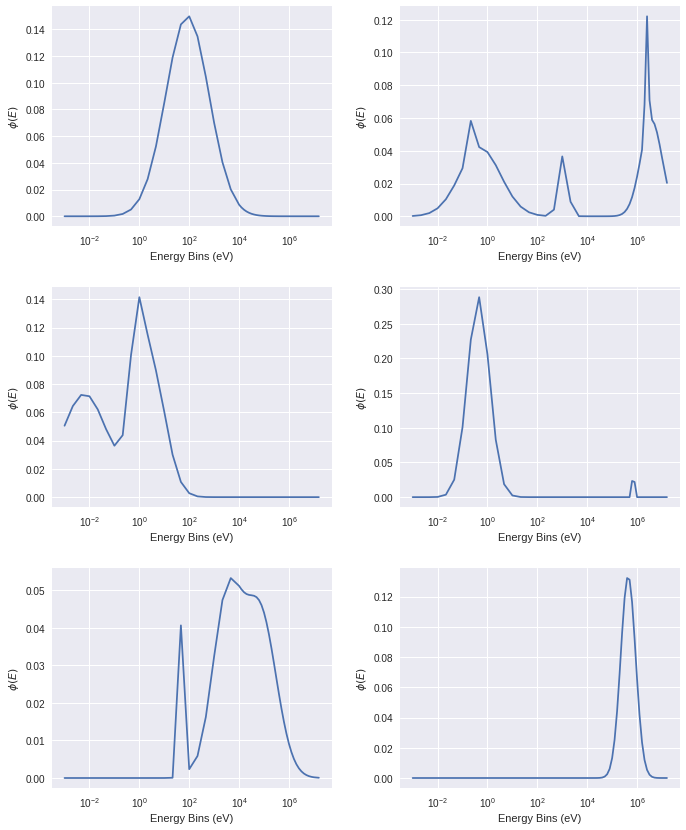

In [4]:
fig, axs = plt.subplots(3,2, figsize = (10,12))
i = 0
for ax in axs:
    for plot in ax:
        plot.plot(constants.Ebins, y[i])
        plot.set_xscale("log")
        plot.set_xlabel("Energy Bins (eV)")
        plot.set_ylabel("$\phi(E)$")
        i += 1

plt.tight_layout()
plt.savefig("GPA_SKEW_Example", dpi = 300)

In [ ]:
## ~~ PARAMETERS DETERMINED AS HYPERPARAMETERS TO A NN ~~ ##
"""
{'target': -326.5754824229038, 
 'params': {'ampDecay': 0.4188232839976492, 
            'amp_skew': 6.201704255764585,
            'extraPeakProb': 0.9079135045419687, 
            'meanPeakWidth': 0.18449138194475942, 
            'stdPeakWidth': 0.03951437070187702, 
            'width_skew': 9.082543887296703}}
"""